In [1]:
import warnings
warnings.filterwarnings('ignore')

from ontocluster import OntoClusterer
import owlready2 as owl

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Creating Dataset

In [2]:
data = pd.read_csv('data.csv')
data.drop(['Timestamp', 'Participant_ID'], 1, inplace = True)
X = pd.get_dummies(data)

from sklearn.decomposition import PCA
pca = PCA(2)
X_dec = pca.fit_transform(X)

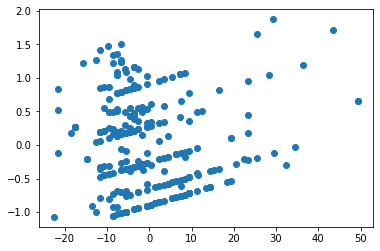

In [3]:
fig, ax = plt.subplots()
ax.scatter(X_dec[:, 0], X_dec[:, 1]);

# Tests

In [4]:
model = OntoClusterer('hdbscan')
model.score(X)

,Time,Silhouette score,Calinski-Harabasz score,Davies-Bouldin score
HDBSCAN,19.0,-0.24292080816982248,8.526196425141265,2.177193131291367
XMeans,19.0,0.2929667002046886,788.0641345550019,0.8096113819739141
Affinity Propagation,322.0,0.32812151604250983,893.1451834559828,0.8195171649182557
Mean Shift,1106.0,0.5588202616533704,357.5419904868396,0.5323084954621067
Best,Lower,1,Higher,0


## HDBSCAN

In [6]:
%%time
model = OntoClusterer('hdbscan')
onto = model.fit(X, data, min_cluster_size = 7)
onto.save('hdbscan.owl')

Wall time: 117 ms


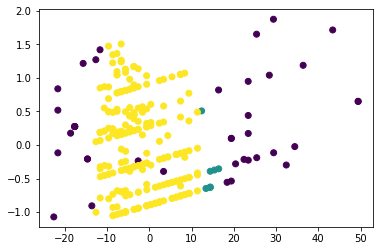

In [7]:
fig, ax = plt.subplots()
ax.scatter(X_dec[:, 0], X_dec[:, 1], c = model.model.labels_);

## XMeans

In [8]:
%%time
model = OntoClusterer('xmeans')
onto = model.fit(X, data, kmax = 0)
onto.save('xmeans.owl')

Wall time: 133 ms


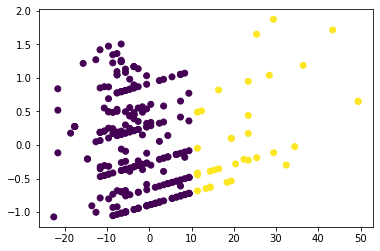

In [9]:
fig, ax = plt.subplots()
ax.scatter(X_dec[:, 0], X_dec[:, 1], c = model.labels);

## Affinity Propagation

In [6]:
%%time
model = OntoClusterer('affinitypropagation')
onto = model.fit(X, data, grid_params = {'max_iter':range(100, 1000, 100)}, scoring = 'silhouette_score')
onto.save('affinitypropagation.owl')

[[{'max_iter': 200}, 0.3275153117556891], [{'max_iter': 300}, 0.3275153117556891], [{'max_iter': 400}, 0.3275153117556891], [{'max_iter': 500}, 0.3275153117556891], [{'max_iter': 600}, 0.3275153117556891], [{'max_iter': 700}, 0.3275153117556891], [{'max_iter': 800}, 0.3275153117556891], [{'max_iter': 900}, 0.3275153117556891]]
0
Wall time: 2.86 s


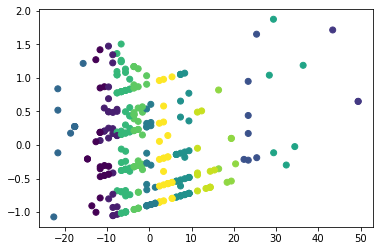

In [7]:
fig, ax = plt.subplots()
ax.scatter(X_dec[:, 0], X_dec[:, 1], c = model.model.labels_);

## Mean Shift

In [10]:
%%time
model = OntoClusterer('meanshift')
onto = model.fit(X, data, bandwidth = 6)
onto.save('meanshift.owl')

Wall time: 862 ms


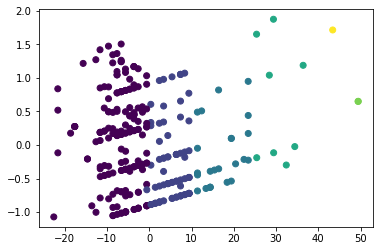

In [11]:
fig, ax = plt.subplots()
ax.scatter(X_dec[:, 0], X_dec[:, 1], c = model.model.labels_);